In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random
import itertools


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA/web-Google.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'web-Google.txt'],
 ['#', 'Webgraph', 'from', 'the', 'Google', 'programming', 'contest,', '2002'],
 ['#', 'Nodes:', '875713', 'Edges:', '5105039'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '11342'],
 ['0', '824020'],
 ['0', '867923'],
 ['0', '891835'],
 ['11342', '0'],
 ['11342', '27469'],
 ['11342', '38716'],
 ['11342', '309564'],
 ['11342', '322178'],
 ['11342', '387543'],
 ['11342', '427436'],
 ['11342', '538214'],
 ['11342', '638706'],
 ['11342', '645018'],
 ['11342', '835220'],
 ['11342', '856657'],
 ['11342', '867923'],
 ['11342', '891835'],
 ['824020', '0'],
 ['824020', '91807'],
 ['824020', '322178'],
 ['824020', '387543'],
 ['824020', '417728'],
 ['824020', '438493'],
 ['824020', '500627'],
 ['824020', '535748'],
 ['824020', '695578'],
 ['824020', '867923'],
 ['824020', '891835'],
 ['867923', '0'],
 ['867923', '11342'],
 ['867923', '136593'],
 ['867923', '414

In [5]:
#taking 1500 random samples from the data
sample = random.sample(res, 1500)
filename=open('data20.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['347098', '654625'],
 ['510801', '35555'],
 ['134329', '755836'],
 ['60563', '450515'],
 ['207611', '721816'],
 ['155175', '96066'],
 ['661656', '351252'],
 ['621798', '316360'],
 ['363194', '809131'],
 ['398889', '702500'],
 ['639424', '335367'],
 ['282291', '801264'],
 ['862680', '513109'],
 ['765516', '307813'],
 ['702080', '599290'],
 ['352771', '59971'],
 ['576541', '270202'],
 ['737748', '93602'],
 ['673824', '554377'],
 ['882254', '711760'],
 ['42024', '538925'],
 ['697163', '887268'],
 ['622950', '45007'],
 ['272717', '878148'],
 ['72475', '383402'],
 ['149482', '469715'],
 ['405485', '407610'],
 ['836765', '477010'],
 ['101337', '597628'],
 ['577273', '828963'],
 ['536756', '829427'],
 ['148696', '298019'],
 ['712171', '510886'],
 ['675412', '779257'],
 ['292284', '384666'],
 ['792261', '619947'],
 ['734364', '210045'],
 ['295167', '178709'],
 ['704148', '671477'],
 ['36751', '387546'],
 ['533227', '703835'],
 ['497124', '35952'],
 ['157688', '887365'],
 ['577631', '265579']

In [7]:
G1=nx.read_edgelist('data20.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 2340
Number of edges: 1191
Average in degree:   0.5090
Average out degree:   0.5090


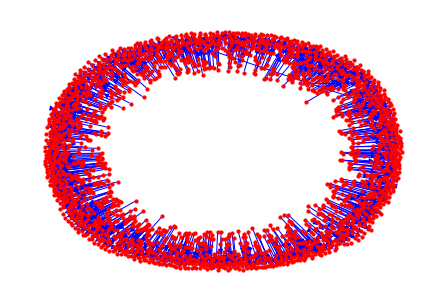

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

###Giant Component

In [9]:
strongly_connected_comp = nx.strongly_connected_components(G2)
Graph1 = max(strongly_connected_comp, key = len)
N = len(G2)


In [10]:
Ng = len(Graph1)

In [11]:
Ng

434818

In [12]:
Ng/N

0.49653025591717836

In [13]:
print(Graph1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



###Girvan Newman Algorithm

In [14]:
def girvan_newman(G, most_valuable_edge=None):
# If the graph is already empty, then its connected components will be returned
  if G.number_of_edges() == 0:
    yield tuple(nx.connected_components(G))
    return
    #Use edge betweeness centrality if no function is given for computing most valuable edge
  if most_valuable_edge is None:
    def most_valuable_edge(G):
      betweenness = nx.edge_betweenness_centrality(G)
      return max(betweenness, key=betweenness.get)
  # The copy of G here must include the edge weight data.
  g = G.copy().to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))
  
  while g.number_of_edges() > 0:
    yield _without_most_central_edges(g, most_valuable_edge)



In [15]:
def _without_most_central_edges(G, most_valuable_edge):
  number_connected = nx.number_connected_components(G)
  new_comp = number_connected
  while new_comp <= number_connected:
    mvedge = most_valuable_edge(G)
    G.remove_edge(*mvedge)
    print("THE REMOVED EDGES ARE : ",end="")
    print(*mvedge)
    new_components = tuple(nx.connected_components(G))
    new_comp = len(new_components)
    return new_components


In [16]:
component_girvan = girvan_newman(G1)

In [17]:
print("Step 1:")
step1 = next(component_girvan)
for i in range(50):
  print(step1[i],end="")

Step 1:
THE REMOVED EDGES ARE : 721816 825468
{654625, 347098}{510801, 35555}{134329, 755836}{60563, 450515}{721816, 207611}{96066, 155175}{661656, 351252}{316360, 621798}{363194, 809131}{398889, 702500}{639424, 335367}{801264, 282291}{862680, 513109}{765516, 307813}{702080, 599290}{59971, 352771}{270202, 576541}{93602, 737748}{673824, 554377}{711760, 882254}{42024, 538925}{697163, 887268}{622950, 45007}{878148, 272717}{383402, 72475}{149482, 469715}{407610, 405485}{477010, 589427, 836765}{101337, 597628}{577273, 828963}{829427, 536756}{148696, 298019}{712171, 510886}{779257, 675412}{170905, 384666, 292284}{619947, 792261}{734364, 210045}{178709, 295167}{704148, 671477}{387546, 36751}{703835, 533227}{35952, 497124}{157688, 887365}{265579, 577631}{833210, 808227, 609028, 885605}{836446, 164126}{472816, 868657}{635456, 41321, 853674, 309995}{747161, 302715}{185844, 896183}

In [18]:
print("Number of Communities in Step 1 are: " + str(len(step1)))


Number of Communities in Step 1 are: 1150


In [19]:
print("Step 2:")
step2 = next(component_girvan)
print("Number of Communities in Step 2 are: " + str(len(step2)))

Step 2:
THE REMOVED EDGES ARE : 309995 853674
Number of Communities in Step 2 are: 1151


In [20]:
step2

({347098, 654625},
 {35555, 510801},
 {134329, 755836},
 {60563, 450515},
 {207611, 721816},
 {96066, 155175},
 {351252, 661656},
 {316360, 621798},
 {363194, 809131},
 {398889, 702500},
 {335367, 639424},
 {282291, 801264},
 {513109, 862680},
 {307813, 765516},
 {599290, 702080},
 {59971, 352771},
 {270202, 576541},
 {93602, 737748},
 {554377, 673824},
 {711760, 882254},
 {42024, 538925},
 {697163, 887268},
 {45007, 622950},
 {272717, 878148},
 {72475, 383402},
 {149482, 469715},
 {405485, 407610},
 {477010, 589427, 836765},
 {101337, 597628},
 {577273, 828963},
 {536756, 829427},
 {148696, 298019},
 {510886, 712171},
 {675412, 779257},
 {170905, 292284, 384666},
 {619947, 792261},
 {210045, 734364},
 {178709, 295167},
 {671477, 704148},
 {36751, 387546},
 {533227, 703835},
 {35952, 497124},
 {157688, 887365},
 {265579, 577631},
 {609028, 808227, 833210, 885605},
 {164126, 836446},
 {472816, 868657},
 {309995, 635456},
 {302715, 747161},
 {185844, 896183},
 {690107, 796126},
 {31765, 

In [21]:
print("Step 3:")
step3 = next(component_girvan)
print("Number of Communities in Step 3 are: " + str(len(step3)))

Step 3:
THE REMOVED EDGES ARE : 157964 597621
Number of Communities in Step 3 are: 1152


In [22]:
step3

({347098, 654625},
 {35555, 510801},
 {134329, 755836},
 {60563, 450515},
 {207611, 721816},
 {96066, 155175},
 {351252, 661656},
 {316360, 621798},
 {363194, 809131},
 {398889, 702500},
 {335367, 639424},
 {282291, 801264},
 {513109, 862680},
 {307813, 765516},
 {599290, 702080},
 {59971, 352771},
 {270202, 576541},
 {93602, 737748},
 {554377, 673824},
 {711760, 882254},
 {42024, 538925},
 {697163, 887268},
 {45007, 622950},
 {272717, 878148},
 {72475, 383402},
 {149482, 469715},
 {405485, 407610},
 {477010, 589427, 836765},
 {101337, 597628},
 {577273, 828963},
 {536756, 829427},
 {148696, 298019},
 {510886, 712171},
 {675412, 779257},
 {170905, 292284, 384666},
 {619947, 792261},
 {210045, 734364},
 {178709, 295167},
 {671477, 704148},
 {36751, 387546},
 {533227, 703835},
 {35952, 497124},
 {157688, 887365},
 {265579, 577631},
 {609028, 808227, 833210, 885605},
 {164126, 836446},
 {472816, 868657},
 {309995, 635456},
 {302715, 747161},
 {185844, 896183},
 {690107, 796126},
 {31765, 

In [23]:
print("Step 4:")
step4 = next(component_girvan)
print("Number of Communities in Step 4 are: " + str(len(step4)))

Step 4:
THE REMOVED EDGES ARE : 833210 885605
Number of Communities in Step 4 are: 1153


In [24]:
step4


({347098, 654625},
 {35555, 510801},
 {134329, 755836},
 {60563, 450515},
 {207611, 721816},
 {96066, 155175},
 {351252, 661656},
 {316360, 621798},
 {363194, 809131},
 {398889, 702500},
 {335367, 639424},
 {282291, 801264},
 {513109, 862680},
 {307813, 765516},
 {599290, 702080},
 {59971, 352771},
 {270202, 576541},
 {93602, 737748},
 {554377, 673824},
 {711760, 882254},
 {42024, 538925},
 {697163, 887268},
 {45007, 622950},
 {272717, 878148},
 {72475, 383402},
 {149482, 469715},
 {405485, 407610},
 {477010, 589427, 836765},
 {101337, 597628},
 {577273, 828963},
 {536756, 829427},
 {148696, 298019},
 {510886, 712171},
 {675412, 779257},
 {170905, 292284, 384666},
 {619947, 792261},
 {210045, 734364},
 {178709, 295167},
 {671477, 704148},
 {36751, 387546},
 {533227, 703835},
 {35952, 497124},
 {157688, 887365},
 {265579, 577631},
 {833210},
 {609028, 808227, 885605},
 {164126, 836446},
 {472816, 868657},
 {309995, 635456},
 {302715, 747161},
 {185844, 896183},
 {690107, 796126},
 {3176

In [25]:
print("Step 5:")
step5 = next(component_girvan)
print("Number of Communities in Step 5 are: " + str(len(step5)))

Step 5:
THE REMOVED EDGES ARE : 804950 324502
Number of Communities in Step 5 are: 1154


In [26]:
step5

({347098, 654625},
 {35555, 510801},
 {134329, 755836},
 {60563, 450515},
 {207611, 721816},
 {96066, 155175},
 {351252, 661656},
 {316360, 621798},
 {363194, 809131},
 {398889, 702500},
 {335367, 639424},
 {282291, 801264},
 {513109, 862680},
 {307813, 765516},
 {599290, 702080},
 {59971, 352771},
 {270202, 576541},
 {93602, 737748},
 {554377, 673824},
 {711760, 882254},
 {42024, 538925},
 {697163, 887268},
 {45007, 622950},
 {272717, 878148},
 {72475, 383402},
 {149482, 469715},
 {405485, 407610},
 {477010, 589427, 836765},
 {101337, 597628},
 {577273, 828963},
 {536756, 829427},
 {148696, 298019},
 {510886, 712171},
 {675412, 779257},
 {170905, 292284, 384666},
 {619947, 792261},
 {210045, 734364},
 {178709, 295167},
 {671477, 704148},
 {36751, 387546},
 {533227, 703835},
 {35952, 497124},
 {157688, 887365},
 {265579, 577631},
 {833210},
 {609028, 808227, 885605},
 {164126, 836446},
 {472816, 868657},
 {309995, 635456},
 {302715, 747161},
 {185844, 896183},
 {690107, 796126},
 {3176

###Ravasz Algorithm

In [27]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

In [28]:
Gu=G1.to_undirected()

In [29]:
def create_hc(G, t):
    labels=list(G.nodes())    #node labels
    path_length=[n for n in nx.all_pairs_shortest_path_length(Gu)]
    #the distance matrix D
    dist_mat=np.zeros((len(G),len(G))) 
    G1_list=list(G.nodes())   
    for u,p in path_length:
        for v,dis in p.items():
            dist_mat[G1_list.index(u)][G1_list.index(v)] = dis
            dist_mat[G1_list.index(v)][G1_list.index(u)] = dis
            if u==v:
                dist_mat[G1_list.index(u)][G1_list.index(u)]=0

    # Creating hierarchical cluster (HC)
    # Creating the HCs using the complete/max/farthest point linkage 
    Y = distance.squareform(dist_mat) ## the upper triangular of the distance matrix 
    Z = hierarchy.average(Y)
    
    #For illustrive purposes, partition selection (t) is arbitrary
    membership=list(hierarchy.fcluster(Z,t=t))
    # Creating collection of lists for blockmodel
    part = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        part[p].append(labels[n])
        
    return Z, membership, part

In [30]:
Z, membership, part = create_hc(Gu, t=0.5) 
part.items()

dict_items([(3, [347098, 510801, 134329, 60563, 207611, 155175, 661656, 621798, 363194, 398889, 639424, 282291, 862680, 765516, 702080, 352771, 576541, 737748, 673824, 882254, 42024, 697163, 622950, 272717, 72475, 149482, 405485, 836765, 101337, 577273, 536756, 148696, 712171, 675412, 292284, 792261, 734364, 295167, 704148, 36751, 533227, 497124, 157688, 577631, 833210, 836446, 868657, 635456, 302715, 896183, 690107, 916149, 267252, 683680, 22652, 430663, 92356, 431011, 626476, 253279, 496295, 415508, 496856, 323038, 209963, 893556, 354661, 678892, 105015, 885752, 741731, 86023, 102365, 470126, 734083, 695316, 181631, 663313, 596476, 893439, 81439, 902482, 404714, 866612, 765315, 824107, 320717, 8433, 383570, 824253, 867519, 708431, 664574, 902568, 158241, 511323, 661214, 91371, 631202, 284727, 107321, 652244, 192455, 710361, 723379, 704147, 592659, 506572, 524005, 848235, 469111, 468940, 412892, 844816, 553892, 610807, 182417, 84548, 121402, 750826, 281402, 258084, 135283, 294493, 695

In [31]:
part = {}
i = 0
for i in range(len(membership)):
    part[i]=membership[i]

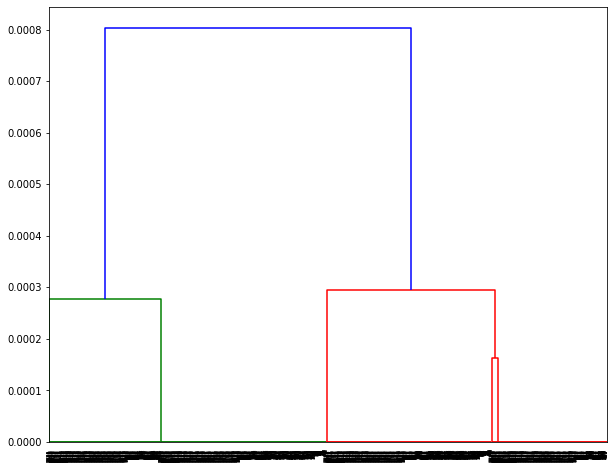

In [32]:
plt.figure(figsize=(10,8))
hierarchy.dendrogram(Z)
plt.show()

In [33]:
#number of communities
len(set(part.values()))

5